### Тестовое задание по вакансии Аналитик

исп. Парфентьева Мария
@MariyaSergeevnaP

В файле выгрузка диалогов пользователей с операторами из службы поддержки по теме получения загранпаспорта. Каждый диалог отмечен уникальным номером чата, у диалога несколько строк, фраза пользователя = id пользователя.																		
Что нужно сделать?																		
  • Нужно разметить любые 100 диалогов подряд, выделить тему обращения (придумать список тем самостоятельно) и эмоциональную оценку пользователя (позитивный, негативный, нейтральный). Для этого создай два новых столбца, в одном нужно указать тему, в другом эмоциональную оценку.																		
  • Каждый диалог должен быть размечен 1-2 раза (больше 1 раза, если в ходе диалога пользователь задает вопросы по новой теме). Необходимо выявить основную тему вопроса пользователя, что он спрашивает у службы поддержки.																		
  • Тему надо определять в общем виде, к примеру «сколько оформляется загранпаспорт». Но и объединять все подряд не стоит. К примеру, если пользователь пишет, что ведомство уже 2 месяца ему не отвечает, это не «сколько оформляется загранпаспорт», а другая тема, к примеру, «нарушение сроков».																		
  • Если ты видишь, что диалог вообще не касается загранпаспорта, укажи в теме «Ошибка классификации».																		
  • Эмоциональная оценка – это то, как ты характеризуешь настроение пользователя. Пишет ли он с негативом, просто спрашивает, или доволен.																		
Разметил, что дальше?																		
  • Данные нужно агрегировать. Создай дополнительный лист, где ты подобьёшь статистику. Необходимо классифицировать обращения по выделенным темам от большего к меньшему в процентном отношении.																		
  • Также нужно подбить статистику по эмоциональной оценке – от негатива к позитиву.																		
  • Последнее что нужно сделать – это на основании выделенной статистики и размеченных диалогов отобразить 3 темы, вызвавших наибольший негатив. По каждой теме должны быть заполнены следующие данные: количество обращений по теме всего, количество негативных обращений по теме, % негативных обращений.																		

In [1]:
import seaborn as sns # Выгружаем библиотеки
sns.set(font_scale=1.5) 
import matplotlib.pyplot as plt
import numpy as np
import re
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
import nltk
from nltk.stem import SnowballStemmer
snowball = SnowballStemmer(language="russian")

In [2]:
import pandas as pd # Импортируем модуль pandas
data = pd.read_excel('ТЗ Аналитик.xlsx', sheet_name='Загранпаспорт') # Загрузим данные из подготовленного файла
df = data.copy()
df = df.drop_duplicates() # Удалим повторяющиеся строки
df.head() # Отобразим получившуюся таблицу

,Номер чата,Дата создания,id пользователя,id оператора,Переписка,Тема обращения,Эмоциональная оценка пользователя
0,1940606892,2021-02-11,25439878.0,NaN,Добрый день,Требуется повторная подача?,Нейтральная
1,1940606892,2021-02-11,NaN,19226.0,"Здравствуйте! Я Надежда, я постараюсь Вам помо...",Требуется повторная подача?,Нейтральная
2,1940606892,2021-02-11,25439878.0,NaN,При отправке заявления на загранпаспорт получи...,Требуется повторная подача?,Нейтральная
3,1940606892,2021-02-11,NaN,19226.0,"Пожалуйста, пришлите скриншот ошибки / страниц...",Требуется повторная подача?,Нейтральная
4,1940606892,2021-02-11,25439878.0,NaN,,Требуется повторная подача?,Нейтральная


На основании проанализированных первых 100 диалогов с пользователями была выделена 21 тема обращений. Технические проблемы с выбором подразделения были вынесены в отдельную тему "Отсутствует выбор подразделения", т.к. встречались наиболее часто. На основании этих данных сформировали сводную таблицу с указанием количества обращений в разрезе Тем обращений, а также посчитали процент обращений от общего количества в разрезе Тем.

In [3]:
# Построим сводную таблицу:
theme = df.groupby(['Тема обращения'])['Номер чата'].nunique().reset_index()
theme.columns = theme.columns.str.replace('Номер чата', 'Количество') # переименуем столбцы
theme = theme.sort_values('Количество', ascending=False, ignore_index=True) # отсортируем по количеству

theme['Процент, %'] = (theme['Количество'] *100 /theme['Количество'].sum()).round(2) # сформируем столбец с расчетом процента от общего количества обращений в разрезе Тем

display(theme)

,Тема обращения,Количество,"Процент, %"
0,Отсутствует выбор подразделения,23,20.18
1,Вопросы по заполнению заявления,15,13.16
2,Технические проблемы с оформлением,12,10.53
3,Запись на подачу документов,10,8.77
4,Почему отклонено,8,7.02
5,Вопросы по предоставлению документов,7,6.14
6,Какой статус у заявления,7,6.14
7,Требуется повторная подача?,6,5.26
8,Почему закрыто,5,4.39
9,Трудности с загрузкой фотографии,4,3.51


Построим диаграмму по полученным данным:

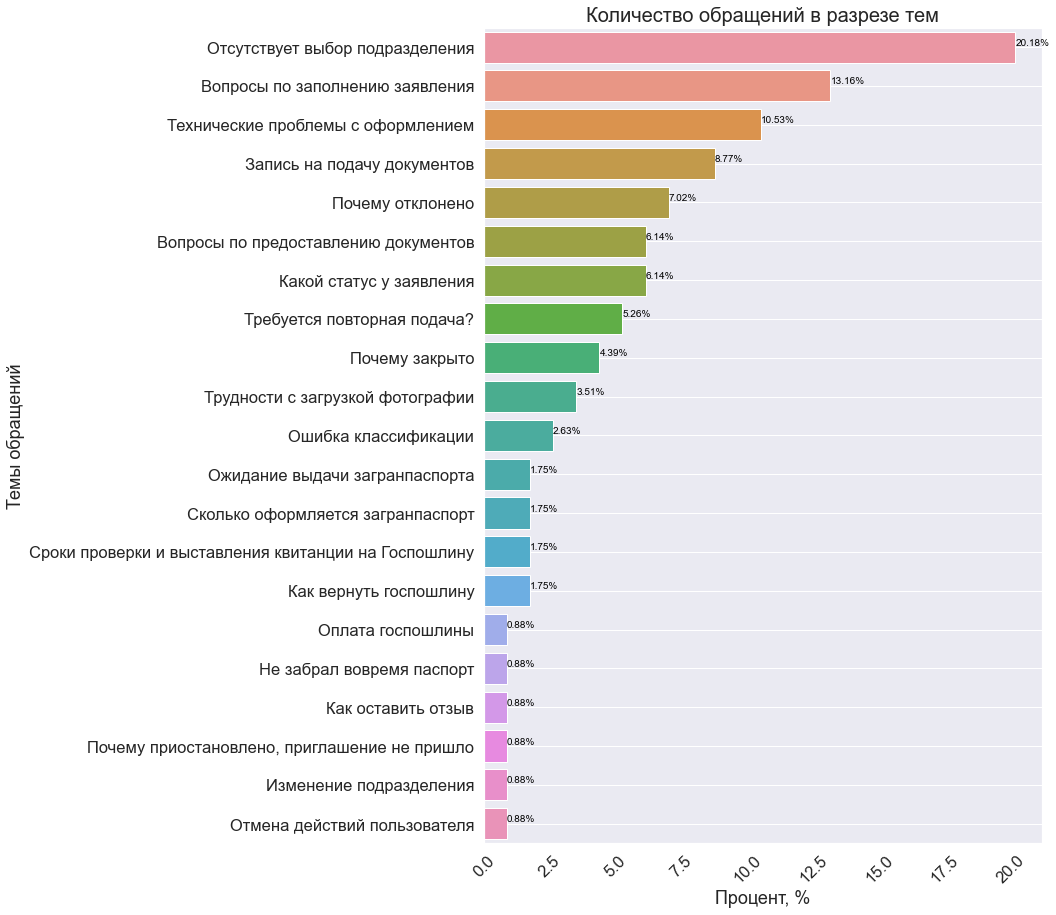

In [4]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 15))
barplot = sns.barplot(
    data=theme,
    x='Процент, %',
    y='Тема обращения'
)
barplot.tick_params(axis='x', rotation=45);
barplot.set_title('Количество обращений в разрезе тем', fontsize=20);
barplot.set_xlabel('Процент, %', fontsize=18);
barplot.set_ylabel('Темы обращений', fontsize=18);
barplot.grid()


for i, v in enumerate(theme["Процент, %"].iteritems()):        
    axes.text(s = "{:,}%".format(v[1]), x = v[1], y = i, verticalalignment="top",color='black', va ='bottom', rotation=0)

По полученным данным видим, что наибольшее количество обращений относится к следующим темам: 1. "Отсутствует выбор подразделения", 			
2. "Вопросы по заполнению заявления", 3. "Технические проблемы с заполнением". Получается, что пользователей в основном интересуют вопросы, связанные с заполнением заявления.			

Проанализировав эмоциональное настроение пользователей на основе диалога с оператором, выделили следующие оценки: негативная - пользователь недоволен, 
в т.ч. присутствует ненормативная лексика, нейтральная - пользователь просто спрашивает, позитивная - пользователь доволен и выражает благодарность (например, спасибо) за полученную информацию.

In [5]:
# Построим сводную таблицу по эмоциональной оценке пользователей:
emotions = df.groupby(['Эмоциональная оценка пользователя'])['Номер чата'].nunique().reset_index()
emotions.columns = emotions.columns.str.replace('Номер чата', 'Количество') # переименуем столбцы
emotions = emotions.sort_values('Эмоциональная оценка пользователя', ascending=True, ignore_index=True) # отсортируем по количеству

emotions['Процент, %'] = (emotions['Количество'] *100 /emotions['Количество'].sum()).round(2) # сформируем столбец с расчетом % от общего количества обращений

display(emotions)

,Эмоциональная оценка пользователя,Количество,"Процент, %"
0,Негативная,6,6.0
1,Нейтральная,72,72.0
2,Позитивная,22,22.0


На основе полученных данных сформировали сводную таблицу в разрезе Эмоциональной оценки пользователей с указанием количества обращений, а также посчитали процент от общего количества обращений. 

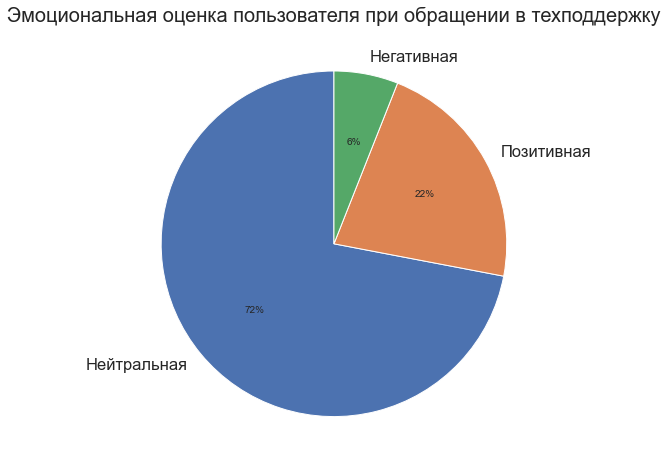

In [6]:
df_emotions = df.drop(columns=['Переписка', 'Тема обращения', 'id оператора', 'id пользователя']).drop_duplicates()

fig = plt.figure(figsize=(12, 6))
ax = fig.add_axes((1, 1, 1, 1))
deaths_count = df_emotions['Эмоциональная оценка пользователя'].value_counts().sort_values(ascending=False).head(7)
pie = ax.pie(
    deaths_count,
    labels=deaths_count.index,
    autopct='%1.0f%%',
    startangle=90
)
title = ax.set_title('Эмоциональная оценка пользователя при обращении в техподдержку', fontsize=20)
plt.show(pie)


Построили круговую диаграмму. Видим, что наибольшее количество пользователей имеют Нейтральное настроение при обращении в поддержку. Негативное настроение имеет наименьший процент пользователей.

По сформированным данным построили таблицу, показывающую 3 темы диалогов, вызвавших наибольший негатив. Указав количество обращений по теме, а также количество негативных обращений по данной теме, посчитали процент негативных обращений.


In [7]:
negative = df[df['Эмоциональная оценка пользователя'] == 'Негативная'
              ].groupby(['Тема обращения'])['Номер чата'].nunique().reset_index()
negative.columns = negative.columns.str.replace('Номер чата', 'Количество негативных обращений')

negative_df = theme.merge(negative)
negative_df['Процент негативных обращений, %'] = (negative_df['Количество негативных обращений'] *100 /negative_df['Количество']).round(2)
negative_df = negative_df.reindex(columns=['Тема обращения', 'Количество', 'Количество негативных обращений', 'Процент негативных обращений, %'])
negative_df = negative_df.sort_values('Процент негативных обращений, %', ascending=False, ignore_index=True)

display(negative_df)

,Тема обращения,Количество,Количество негативных обращений,"Процент негативных обращений, %"
0,Почему закрыто,5,1,20.00
1,Отсутствует выбор подразделения,23,4,17.39
2,Почему отклонено,8,1,12.50


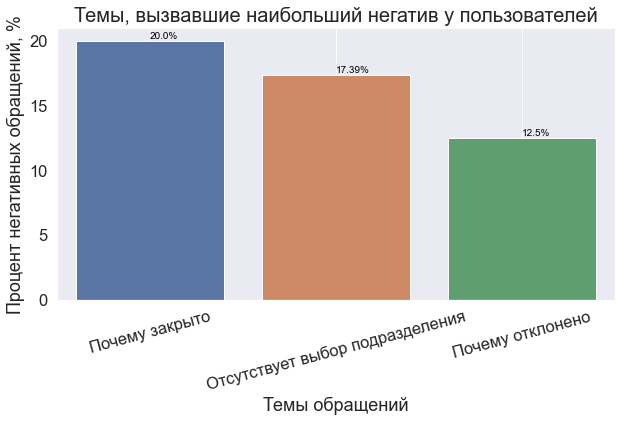

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
barplot = sns.barplot(
    data=negative_df,
    y='Процент негативных обращений, %',
    x='Тема обращения'
)
barplot.tick_params(axis='x', rotation=15);
barplot.set_title('Темы, вызвавшие наибольший негатив у пользователей', fontsize=20);
barplot.set_xlabel('Темы обращений', fontsize=18);
barplot.set_ylabel('Процент негативных обращений, %', fontsize=18);
barplot.grid()


for i, v in enumerate(negative_df["Процент негативных обращений, %"].iteritems()):        
    axes.text(s = "{:,}%".format(v[1]), y = v[1], x = i, verticalalignment="top",color='black', va ='bottom', rotation=0)

Построили столбчатую диаграмму. Видим, что темами, вызвавшими наибольший негатив являются: "Почему закрыто", "Отсутствует выбор подразделения" и "Почему отклонено". У них процент негативных обращений от количества обращений по теме составляет 20%, 17,39% и 12,5% соответственно. Т.е. пользователей возмущает, что Заявления переходят в статус "Закрыто", при этом они услугу не получили, и в большинстве случаев Приглашение на подачу документов не приходило. Негативное настроение у пользователей вызывают также и технические неполадки на портале.